In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Problem 1
Compute the entropy of a five-coin-flip experiment with p = 0.5

$H =\\ 
-0.5^5\        \cdot \log_2(0.5^5) + \\ 
-5\cdot0.5^5\  \cdot \log_2(5\cdot0.5^5) + \\
-10\cdot0.5^5\ \cdot \log_2(10\cdot0.5^5) + \\
-10\cdot0.5^5\ \cdot \log_2(10\cdot0.5^5) + \\
-5\cdot0.5^5\  \cdot \log_2(5\cdot0.5^5) + \\
-0.5^5\        \cdot \log_2(0.5^5) \\ 
$

Might be easiest to use our tools to do the math:

In [4]:
p = stats.binom(p=0.5,n=5).pmf([0,1,2,3,4,5])
H = -(p * np.log2(p)).sum()
print(f"H = {H:0.3f} bits")

H = 2.198 bits


#### Problem 2
Compute the entropy of a five-coin flip experiment with p = p

A straight application of the definition of entropy gives:
<div>
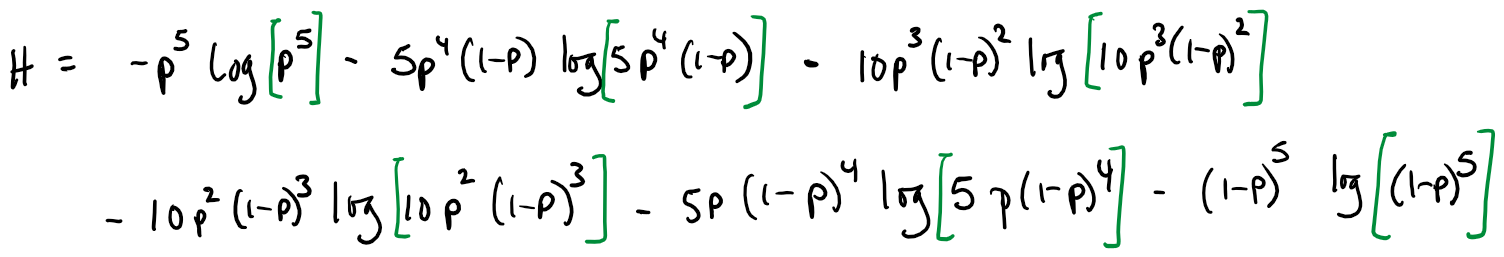
</div>

After some effort I was able to simplify to:
<div>
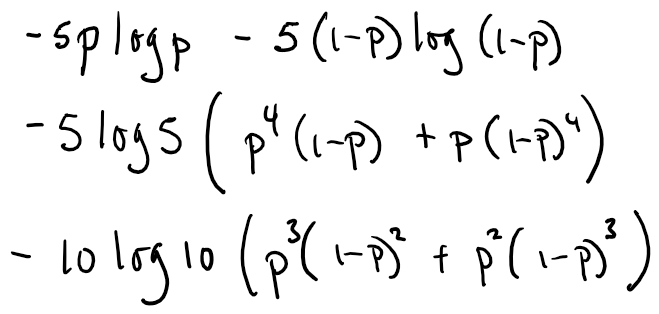
</div>

If you substitute $p=0.5$, you get the same result as Problem 1, so that's encouraging.

Consider the following sample space for random variables x and y
<div>
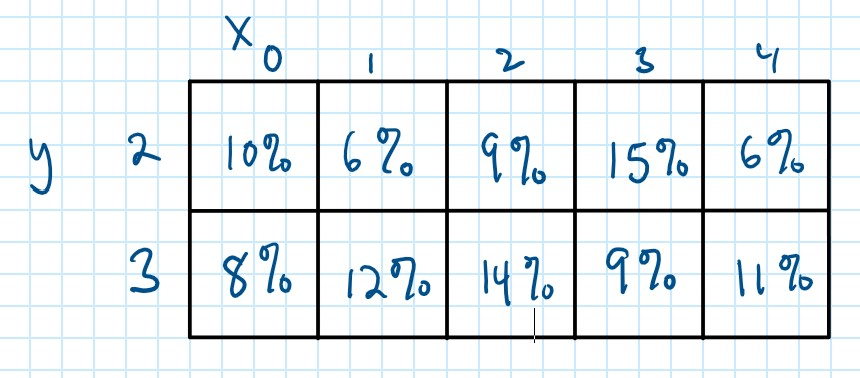
</div>

#### Problem 3
Compute the joint entropy of x and y.

$H = \\
-0.10\cdot\log_20.10 -0.08\cdot\log_20.08 + \\
-0.06\cdot\log_20.06 -0.12\cdot\log_20.12 + \\
-0.09\cdot\log_20.09 -0.14\cdot\log_20.14 + \\
-0.15\cdot\log_20.15 -0.09\cdot\log_20.09 + \\
-0.06\cdot\log_20.06 -0.11\cdot\log_20.11 = 3.2611\ \textrm{bits}$

#### Problem 4
Compute the entropy of x given y
$
H = \\
-0.10\cdot\log_210/46 - 0.08\cdot\log_28/54 + \\
-0.06\cdot\log_26/46  - 0.12\cdot\log_212/54 + \\
-0.09\cdot\log_29/46 - 0.14\cdot\log_214/54 + \\
-0.15\cdot\log_215/46 - 0.09\cdot\log_29/54 + \\
-0.06\cdot\log_26/46 - 0.11\cdot\log_211/54 = 2.2657\ \textrm{bits}$

#### Problem 5
Compute the mutual information between x and y

Easiest way is to use $I(x;y) = H(x) - H(x|y)$. Since we already have $H(x|y)$, we just need $H(x)$ as follows:

$H(x) = -0.18\cdot\log_20.18 - 0.18\cdot\log_20.18 - 0.23\cdot\log_20.23 - 0.24\cdot\log_20.24 - 0.17\cdot\log_20.17 = 2.3070 \textrm{bits}$

Therefore:

$I(x;y) = 2.3070 - 2.2657 = 0.041 \textrm{bits}$

#### Problem 6

Compute the mutual information between random variables x and y in `hw_10.csv`.

The easiest way to work this out is to bin the data, effectively turning it from continuous to discrete. I did this using a 2D histogram function, and then computed the likelihood of being in each bin, and used those as the probabilities for computing mutual information:

In [25]:
data = np.loadtxt('hw10.csv',skiprows=1,delimiter=",")
h,_,_ = np.histogram2d(data[:,0],data[:,1],bins=10)

p  = h            /h.sum()
px = h.sum(axis=1)/h.sum()
py = h.sum(axis=0)/h.sum()

Hx = -(px*np.log2(px)).sum()
Hy = -(px*np.log2(py)).sum()

Hxy = sum([-pp*np.log2(pp) for pp in p.flatten() if pp > 0])

I = Hx + Hy - Hxy
print(f"I = {I:0.4f} bits")

I = 2.0015 bits
